In [84]:
#importar la librerias
import pandas as pd
import os
import matplotlib.pyplot as plt
import re
import datetime as dt

In [69]:
os.listdir('files')

['Sales_April_2019.csv',
 'Sales_August_2019.csv',
 'Sales_December_2019.csv',
 'Sales_February_2019.csv',
 'Sales_January_2019.csv',
 'Sales_July_2019.csv',
 'Sales_June_2019.csv',
 'Sales_March_2019.csv',
 'Sales_May_2019.csv',
 'Sales_November_2019.csv',
 'Sales_October_2019.csv',
 'Sales_September_2019.csv']

In [70]:
#leactura de csv de pandas
df=pd.DataFrame()

In [71]:
files=os.listdir('files')
for x in files:
    file=pd.read_csv('files/'+x)
    df=pd.concat([file,df])


In [72]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,248151,AA Batteries (4-pack),4,3.84,09/17/19 14:44,"380 North St, Los Angeles, CA 90001"
1,248152,USB-C Charging Cable,2,11.95,09/29/19 10:19,"511 8th St, Austin, TX 73301"
2,248153,USB-C Charging Cable,1,11.95,09/16/19 17:48,"151 Johnson St, Los Angeles, CA 90001"
3,248154,27in FHD Monitor,1,149.99,09/27/19 07:52,"355 Hickory St, Seattle, WA 98101"
4,248155,USB-C Charging Cable,1,11.95,09/01/19 19:03,"125 5th St, Atlanta, GA 30301"


In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 186850 entries, 0 to 18382
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 10.0+ MB


In [74]:
df.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
dtype: object

In [75]:
#conteo de valores nulos
df['Order ID'].isnull().value_counts()

False    186305
True        545
Name: Order ID, dtype: int64

In [76]:
df=df[df['Order ID'].notnull()]

In [77]:
df.isnull().value_counts()

Order ID  Product  Quantity Ordered  Price Each  Order Date  Purchase Address
False     False    False             False       False       False               186305
dtype: int64

In [78]:
#definir el tipo de cada variable
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,248151,AA Batteries (4-pack),4,3.84,09/17/19 14:44,"380 North St, Los Angeles, CA 90001"
1,248152,USB-C Charging Cable,2,11.95,09/29/19 10:19,"511 8th St, Austin, TX 73301"
2,248153,USB-C Charging Cable,1,11.95,09/16/19 17:48,"151 Johnson St, Los Angeles, CA 90001"
3,248154,27in FHD Monitor,1,149.99,09/27/19 07:52,"355 Hickory St, Seattle, WA 98101"
4,248155,USB-C Charging Cable,1,11.95,09/01/19 19:03,"125 5th St, Atlanta, GA 30301"


In [79]:
df=df[df['Product']!='Product']

In [80]:
df['Quantity Ordered']=df['Quantity Ordered'].astype('int64')
df['Price Each']=df['Price Each'].astype('float')
df['Order Date']=pd.to_datetime(df['Order Date'])

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185950 entries, 0 to 18382
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order ID          185950 non-null  object        
 1   Product           185950 non-null  object        
 2   Quantity Ordered  185950 non-null  int64         
 3   Price Each        185950 non-null  float64       
 4   Order Date        185950 non-null  datetime64[ns]
 5   Purchase Address  185950 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 9.9+ MB


# CUAL FUE EL MES CON LA VENTA MAS ALTA

In [87]:
#extraer el mes
df['Mes']=df['Order Date'].dt.month\

#realizar la multiplicacion de precio por cantidad
df['Total_Ventas']=df['Quantity Ordered']*df['Price Each']

In [95]:
#agrupaciones primero por mes
df_mes=df.groupby('Mes').sum()

#resetear el indice
df_mes=df_mes.reset_index()


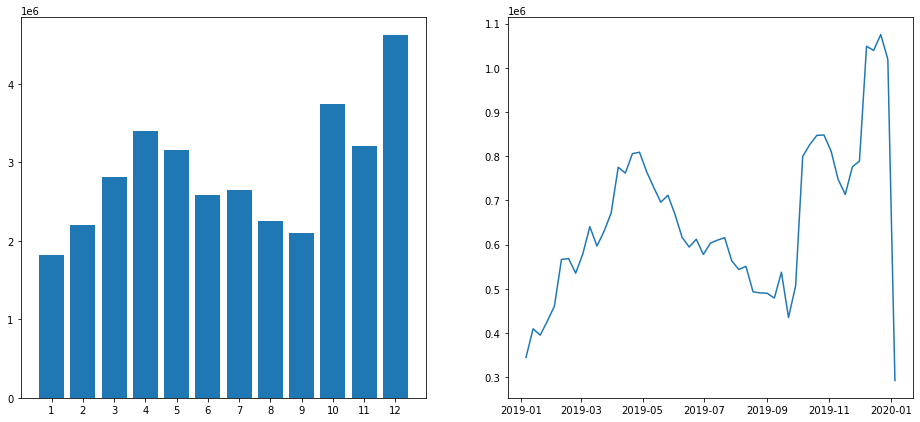

In [113]:
#subplot de graficos
fig, axes=plt.subplots(1,2, figsize=(16,7))
ax1=plt.subplot(1,2,1)
ax2=plt.subplot(1,2,2)
ax1.bar(df_mes['Mes'], df_mes['Total_Ventas'])
ax2.plot(df_fecha['Total_Ventas'])
ax1.set_xticks(df_mes['Mes'])

plt.show()

In [92]:
df_mes

,Quantity Ordered,Price Each,Total_Ventas
Mes,,,
1,10903,1.811768e+06,1.822257e+06
2,13449,2.188885e+06,2.202022e+06
3,17005,2.791208e+06,2.807100e+06
4,20558,3.367671e+06,3.390670e+06
5,18667,3.135125e+06,3.152607e+06
6,15253,2.562026e+06,2.577802e+06
7,16072,2.632540e+06,2.647776e+06
8,13448,2.230345e+06,2.244468e+06
9,13109,2.084992e+06,2.097560e+06


In [106]:
#agrupacion la voy haver por fecha
df_fecha=df.groupby('Order Date').sum()

In [109]:
df_fecha=df_fecha.resample('W').sum()
df_fecha

,Quantity Ordered,Price Each,Mes,Total_Ventas
Order Date,,,,
2019-01-06,2045,343062.87,1815,344855.67
2019-01-13,2457,407539.11,2199,409428.28
2019-01-20,2462,392745.06,2200,394936.90
2019-01-27,2525,424518.30,2237,426632.16
2019-02-03,2780,456563.41,3728,460355.55
2019-02-10,3299,563327.94,5934,566203.88
2019-02-17,3435,565026.42,6114,568227.10
2019-02-24,3397,530962.84,5976,535323.33
2019-03-03,3543,575845.83,7832,578418.38


In [114]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Mes,Total_Ventas
0,248151,AA Batteries (4-pack),4,3.84,2019-09-17 14:44:00,"380 North St, Los Angeles, CA 90001",9,15.36
1,248152,USB-C Charging Cable,2,11.95,2019-09-29 10:19:00,"511 8th St, Austin, TX 73301",9,23.90
2,248153,USB-C Charging Cable,1,11.95,2019-09-16 17:48:00,"151 Johnson St, Los Angeles, CA 90001",9,11.95
3,248154,27in FHD Monitor,1,149.99,2019-09-27 07:52:00,"355 Hickory St, Seattle, WA 98101",9,149.99
4,248155,USB-C Charging Cable,1,11.95,2019-09-01 19:03:00,"125 5th St, Atlanta, GA 30301",9,11.95
